In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import random

SEED = 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

IMDb 데이터셋을 불러오자.

관객들이 영화에 대해 남긴 리뷰와 각 리뷰에 대해 목표 레이블 (1: 긍정, 0:부정) 이 정리된 데이터

훈련 데이터 25000, 검증 데이터 25000

load_data함수의 num_words 옵션에 사용할 단어의 개수를 지정한다.

많이 사용된 단어 순서대로 10,000개를 가져와 사용함

In [2]:
from tensorflow.keras import datasets
imdb = datasets.imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000, index_from = 3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

17464789/17464789 [==============================] - 0s 0us/step
(25000,) (25000,)
(25000,) (25000,)


In [3]:
#첫 번째 리뷰 - 벡터
print(X_train[0])

#숫자 데이터를 갖는 리스트가 표시되는데
#각 숫자는 실제로는 단어를 나타낸다.
#자연어를 딥러닝 모델에 입력하기 위해 각 단어를 숫자와 1:1 매핑하여 숫자 인덱스로 인코딩 변환했기 때문

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
#첫 번째 리뷰의 길이
len(X_train[0])

#모두 218개의 단어로 이루어진 리뷰라는 것을 알 수 있다.

218

In [5]:
word_index = imdb.get_word_index()
word_index
#각 단어와 매핑된 숫자 인덱스가 딕셔너리 형태로 정리되어 있다.

1641221/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [12]:
#숫자 벡터를 텍스트로 변환
def decode_review_vector(review_vector):
  index_to_word = {value:key for key, value in word_index.items()}
  decoded_review = ' '.join([index_to_word.get(idx - 3, '?') for idx in review_vector])
  return decoded_review

decode_review_vector(X_train[0])

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
y_train[0]

1

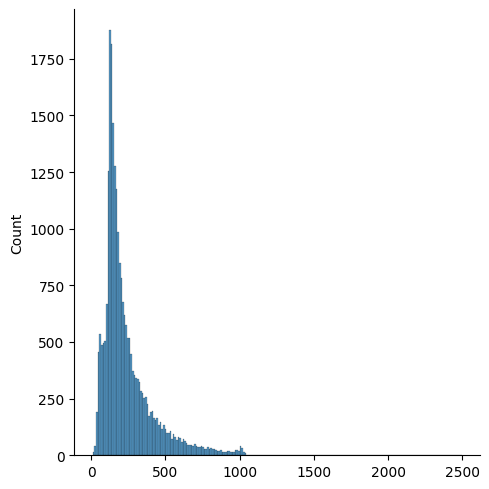

In [9]:
#각 리뷰의 단어 개수 분포
review_length = [len(review) for review in X_train]
sns.displot(review_length);

각 리뷰 데이터의 길이가 모두 제각각 다르다.
딥러닝 모델에 입력하기 위해 데이터의 크기를 동일하게 조정해야 한다.

입력의 최대 길이를 설정

최대 길이보다 길이가 긴 경우, 중간에 잘라서 길이를 맞추고

짧은 경우, 부족한 만큼 숫자 0으로 채운다

--> 제로 패딩

In [14]:
#가장 빈도가 많은 단어 길이를 최대 길이로 지정하자.
#padding
from tensorflow.keras.preprocessing import sequence
X_train_pad = sequence.pad_sequences(X_train, maxlen = 250)
X_test_pad = sequence.pad_sequences(X_test, maxlen = 250)
print(X_train_pad[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    1   14   22   16   43  530  973 1622 1385   65
  458 4468   66 3941    4  173   36  256    5   25  100   43  838  112
   50  670    2    9   35  480  284    5  150    4  172  112  167    2
  336  385   39    4  172 4536 1111   17  546   38   13  447    4  192
   50   16    6  147 2025   19   14   22    4 1920 4613  469    4   22
   71   87   12   16   43  530   38   76   15   13 1247    4   22   17
  515   17   12   16  626   18    2    5   62  386   12    8  316    8
  106    5    4 2223 5244   16  480   66 3785   33    4  130   12   16
   38  619    5   25  124   51   36  135   48   25 1415   33    6   22
   12  215   28   77   52    5   14  407   16   82    2    8    4  107
  117 5952   15  256    4    2    7 3766    5  723   36   71   43  530
  476   26  400  317   46    7    4    2 1029   13  104   88    4  381
   15 

앞에서 모든 리뷰가 동일한 길이를 갖도록 정리 완료

IMDb 데이터를 불러올 때 num_words 에 사용할 단어 개수를 10,000 개로 설정했기 때문에각 리뷰는 10,000개의 단어 사전에 들어있는 단어로 표현되어 있다.

단어 사전에 등록된 10,000개 단어를 기준으로 원핫 인코딩을 적용하여 원핫 벡터로 변환하면 딥러닝 모델의 입력 데이터로 사용할 수 있다.

하지만,

단어 사전의 크기만큼 원핫 벡터의 크기는 10,000이 되고, 단어 길이가 250인 리뷰의 경우대부분의 값이 0으로 채워지는 희소 벡터가 된다

따라서, 모델에 충분한 정보를 전달하기 어려워지고 단어 사이의 유사성 등 언어적 특징을 모델이 학습할 수 없다.



단어 임베딩

이런 한계를 극복하기 위해 제안된 방법

단어 사이의 관계를 모델 학습하여 서로 유사한 단어들끼리 벡터 공간에서 비슷한 위치에 배치한다. 단어들 사이의 관계를 벡터의 방향과 거리로 나타낼 수 있다. 이런 식으로 각 단얼를 저차원의 벡터로 표현하게 된다.

케라스는 임베딩 레이어를 지원하고 있기 때문에 말뭉치(corpus)를 입력하여 단어 사이의 유사도와 여러 가지 관계를 벡터로 표현 가능

임베딩 레이어로 IMDb 데이터셋을 저차원의 벡터로 표현하고, 딥러닝 모델로 학습하여 영화 리뷰가 긍정인지 부정인지 예측해본다.

In [16]:
#모델 정의
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU

def build_model(model_type='RNN'):
  model = Sequential()  #Sequential 클래스 객체로 모델 생성

  #Embedding
  #첫 번째 레이어로 embedding을 추가,
  #단어 사전의 크기에 맞춰 input_dim
  #임베딩으로 변환되는 출력 벡터의 차원을 output_dim에 설정: 128차원의 벡터로 출력 크기 설정
  model.add(Embedding(input_dim=10000, output_dim = 128))

  #RNN
  if model_type =='RNN':
    model.add(SimpleRNN(units=64, return_sequences = True)) #return_sequences = true: 모든 시간의 출력값을 그대로 다음 레이어에 전달한다는 뜻
    #만약, false: 최종 레이어의 출력만을 반환한다
    model.add(SimpleRNN(units=64))

  #LSTM
  elif model_type =='LSTM':
    model.add(LSTM(units=64, return_sequences=True))
    model.add(LSTM(units=64))

  #GRU
  elif model_type =='GRU':
    model.add(GRU(units=64, return_sequences=True))
    model.add(GRU(units=64))

  #Dense Classifier
  model.add(Dense(units=32, activation='relu'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(units=1, activation='sigmoid'))

  #Compile
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  return model


#RNN

RNN은 순서가 있는 시퀀스 데이터를 입력받아 순서대로 하나씩 데이터를 처리

따라서 모든 입력 데이터를 한번에 처리하는 MLP & CNN 신경망과 차이가 있다.

우리가 분석하고 있는 영화 리뷰는 단어들이 순서대로 관계를 맺고 연결되어 있는 시퀀스 데이터이므로

RNN 신경망에 단어를 순서대로 하나씩 RNN 레이어에 입력하고 다음 단어를 예측해야 한다.

다음 단어(정답)와 출력(예측)의 차이(손실함수)를 최소화하는 가중치를 학습한다

In [17]:
rnn_model = build_model('RNN')
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, None, 64)          12352     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1302721 (4.97 MB)
Trainable params: 130272

In [18]:
#제로 패딩으로 길이를 맞춘 데이토로 입력하여 모델을 훈련하자
rnn_history = rnn_model.fit(X_train_pad, y_train, batch_size=32, epochs=10,
                            validation_split=0.1, verbose=2)

Epoch 1/10
704/704 - 129s - loss: 0.7000 - accuracy: 0.5043 - val_loss: 0.6935 - val_accuracy: 0.4932 - 129s/epoch - 183ms/step
Epoch 2/10
704/704 - 136s - loss: 0.6656 - accuracy: 0.5736 - val_loss: 0.6393 - val_accuracy: 0.6344 - 136s/epoch - 193ms/step
Epoch 3/10
704/704 - 125s - loss: 0.5976 - accuracy: 0.6885 - val_loss: 0.5848 - val_accuracy: 0.7004 - 125s/epoch - 177ms/step
Epoch 4/10
704/704 - 134s - loss: 0.5303 - accuracy: 0.7497 - val_loss: 0.7041 - val_accuracy: 0.6140 - 134s/epoch - 190ms/step
Epoch 5/10
704/704 - 128s - loss: 0.4775 - accuracy: 0.7843 - val_loss: 0.5488 - val_accuracy: 0.7348 - 128s/epoch - 182ms/step
Epoch 6/10
704/704 - 137s - loss: 0.4014 - accuracy: 0.8315 - val_loss: 0.4581 - val_accuracy: 0.8000 - 137s/epoch - 195ms/step
Epoch 7/10
704/704 - 92s - loss: 0.3969 - accuracy: 0.8355 - val_loss: 0.4939 - val_accuracy: 0.7716 - 92s/epoch - 131ms/step
Epoch 8/10
704/704 - 94s - loss: 0.4044 - accuracy: 0.8308 - val_loss: 0.5002 - val_accuracy: 0.7704 - 94s

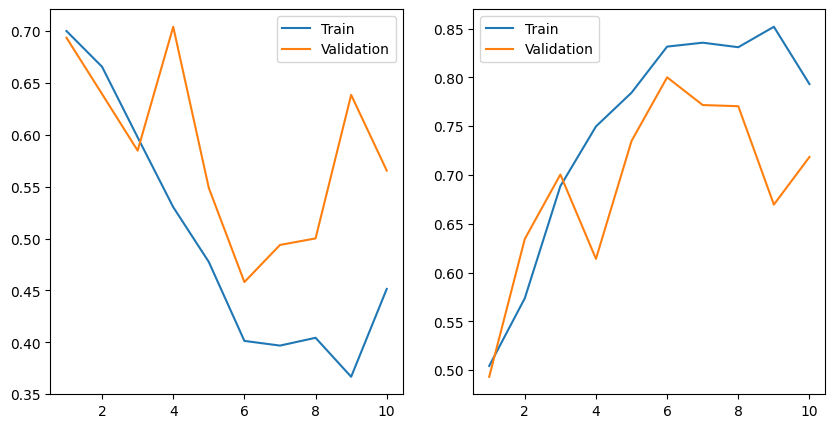

In [19]:
#그래프를 그려 학습 결과를 시각화하자
#5에포크까지는 학습이 잘 이루어지다가 그 이후에는 과대적합이 발생한 것으로 보인다
#검증 정확도는 0.75 수준에서 더 개선되지 않는다.

def plot_metrics(history, start=1, end=20):
  fig, axes = plt.subplots(1,2,figsize=(10,5))
  #loss: 손실함수
  axes[0].plot(range(start, end+1), history.history['loss'][start-1:end],
               label='Train')
  axes[0].plot(range(start, end+1), history.history['val_loss'][start-1:end],
               label='Validation')
  axes[0].legend()

  #Accuracy
  axes[1].plot(range(start, end+1), history.history['accuracy'][start-1:end],
               label='Train')
  axes[1].plot(range(start, end+1), history.history['val_accuracy'][start-1:end],
               label = 'Validation')
  axes[1].legend()

plt.show()
plot_metrics(history=rnn_history, start=1, end=10)



#LSTM

RNN의 단점을 보완한 모델이다.

RNN은 레이어를 여러 개 거치면서 처음에 입력했던 단어에 대한 정보를 조금씩 잃어버리게 된다.최근에 학습한 단어가 모델의 최종 예측에 더 큰 영향을 주게된다.

따라서, RNN 모델이 단기 의존성이 높다고 말한다.

LSTM은 RNN 모델이 오래 전에 학습한 데이터를 잘 기억하지 못하는 단점을 해결하기 위해, 기존 정보 중에서 중요한 정보를 다음 단계에 전달하는 구조를 도입하였다.


이와 같이 모델의 장기 기억 성능을 개선했기 때문에 길이가 긴 시퀀스 데이터를 학습하는데 적합하다.

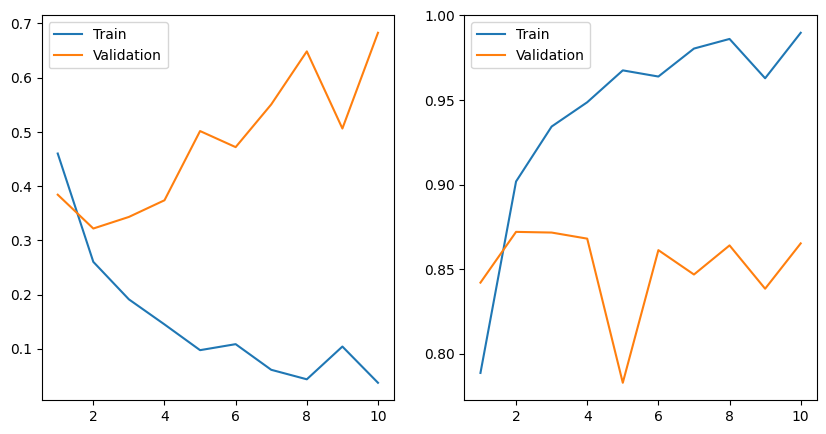

In [20]:
#LSTM 모델 적용

#학습 초기에도 굉장히 좋은 성능을 보인다.
#과대 적합이 초기부터 발생한 것으로 보인다..
#LSTM 레이어를 2개 사용했는데 1개만 사용하거나 모델 구조를 단순화하는 시도가 필요해 보인다.

lstm_model = build_model('LSTM')
lstm_history = lstm_model.fit(X_train_pad, y_train, batch_size=32, epochs=10,
                              validation_split=0.1, verbose = 0)
plot_metrics(history =lstm_history, start=1, end=10)

#GRU

LSTM의 느린 학습 속도를 개선하기 위해 제안된 알고리즘

LSTM은 입력 시퀀스의 길이가 길어지면 학습해야 하는 가중치 파라미터의 개수가 기하급수적으로 늘기 때문에 학습 속도가 느리다는 단점이 있다.

GRU는 LSTM의 셀을 단순한 구조로 변경하여 모델의 파라미터 개수를 줄이고 학습속도를 개선한 모델

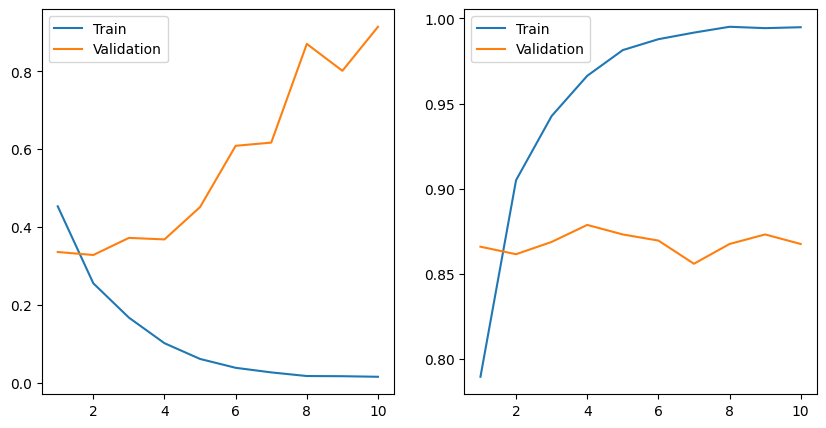

In [22]:
#GRU 모델 적용

#LSTM과 모델 성능은 비슷하고, 과대적합이 발생하는 패턴도 비슷
gru_model = build_model('GRU')
gru_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
gru_history = gru_model.fit(X_train_pad, y_train, batch_size =32, epochs=10,
                            validation_split=0.1, verbose=0)
plot_metrics(history=gru_history, start=1, end=10)